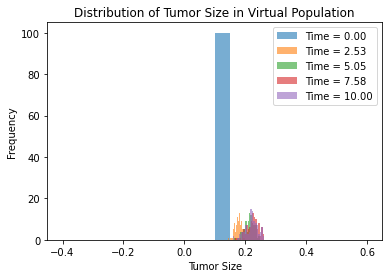

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the Virtual Population parameters (mean and standard deviation)
mean_k1 = 0.1
std_k1 = 0.01
mean_k2 = 0.05
std_k2 = 0.005

# Define the number of virtual patients
num_patients = 100

# Create Virtual Populations by sampling parameters from normal distributions
k1_values = np.random.normal(mean_k1, std_k1, num_patients)
k2_values = np.random.normal(mean_k2, std_k2, num_patients)

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Simulate the model for each virtual patient and store the results
results = []
for i in range(num_patients):
    k1 = k1_values[i]
    k2 = k2_values[i]
    y0 = [1.0, 0.1]  # Initial drug concentration and tumor size
    sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
    results.append(sol.y[1])  # Store only the tumor size

# Plot the distribution of tumor size at different time points
time_indices = [0, 25, 50, 75, 99]
for idx in time_indices:
    tumor_size_at_time = [result[idx] for result in results]
    plt.hist(tumor_size_at_time, bins=20, alpha=0.6, label=f"Time = {t_values[idx]:.2f}")

plt.xlabel("Tumor Size")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Tumor Size in Virtual Population")
plt.show()


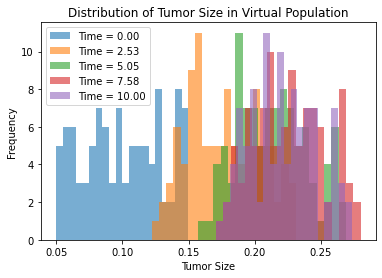

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the common parameters for all virtual patients
k1 = 0.1
k2 = 0.05

# Define the number of virtual patients
num_patients = 100

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Simulate the model for each virtual patient and store the results
results = []
for i in range(num_patients):
    # Generate random initial drug concentration and tumor size for each patient
    C_blood_initial = np.random.uniform(0.8, 1.2)  # Initial drug concentration
    Tumor_size_initial = np.random.uniform(0.05, 0.15)  # Initial tumor size
    y0 = [C_blood_initial, Tumor_size_initial]
    
    # Solve the ODE for the current virtual patient
    sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
    results.append(sol.y[1])  # Store only the tumor size

# Plot the distribution of tumor size at different time points
time_indices = [0, 25, 50, 75, 99]
for idx in time_indices:
    tumor_size_at_time = [result[idx] for result in results]
    plt.hist(tumor_size_at_time, bins=20, alpha=0.6, label=f"Time = {t_values[idx]:.2f}")

plt.xlabel("Tumor Size")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Tumor Size in Virtual Population")
plt.show()


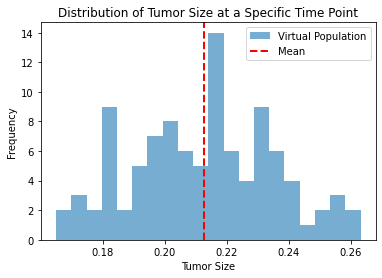

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the common parameters for all virtual patients
k1 = 0.1
k2 = 0.05

# Define the number of virtual patients
num_patients = 100

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Simulate the model for each virtual patient and store the results
results = []
for i in range(num_patients):
    # Generate random initial drug concentration and tumor size for each patient
    C_blood_initial = np.random.uniform(0.8, 1.2)  # Initial drug concentration
    Tumor_size_initial = np.random.uniform(0.05, 0.15)  # Initial tumor size
    y0 = [C_blood_initial, Tumor_size_initial]
    
    # Solve the ODE for the current virtual patient
    sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
    results.append(sol.y[1])  # Store only the tumor size

# Generate experimental data (make-up data)
experimental_tumor_size = np.random.normal(0.08, 0.02, num_patients)  # Mean=0.08, Std=0.02

# Define the objective function to minimize (sum of squared differences)
def objective_function(weights):
    simulated_tumor_size = np.sum(np.array(results) * weights[:, np.newaxis], axis=0)
    return np.sum((simulated_tumor_size - experimental_tumor_size)**2)

# Initialize weights for each virtual patient with equal values (w1 = w2 = ... = w100)
initial_weights = np.ones(num_patients) / num_patients

# Perform the optimization to find the best weights for each virtual patient
result = minimize(objective_function, initial_weights, bounds=[(0, 1)] * num_patients)

# Extract the optimized weights for each virtual patient
optimized_weights = result.x

# Simulate the model with the optimized weights for each virtual patient
simulated_tumor_size = np.sum(np.array(results) * optimized_weights[:, np.newaxis], axis=0)

# Plot the distribution of tumor size at the specific time point
time_point_index = 50  # Choose a specific time point (e.g., index 50)
tumor_size_at_time = [result[time_point_index] for result in results]

plt.hist(tumor_size_at_time, bins=20, alpha=0.6, label="Virtual Population")
plt.axvline(np.mean(tumor_size_at_time), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Tumor Size")
plt.ylabel("Frequency")
plt.title("Distribution of Tumor Size at a Specific Time Point")
plt.legend()
plt.show()


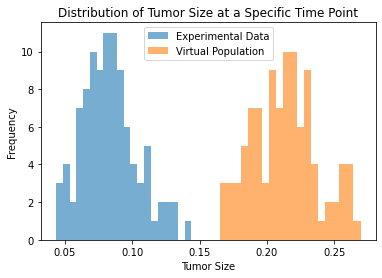

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import ks_2samp

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the common parameters for all virtual patients
k1 = 0.1
k2 = 0.05

# Define the number of virtual patients
num_patients = 100

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Simulate the model for each virtual patient and store the results
results = []
for i in range(num_patients):
    # Generate random initial drug concentration and tumor size for each patient
    C_blood_initial = np.random.uniform(0.8, 1.2)  # Initial drug concentration
    Tumor_size_initial = np.random.uniform(0.05, 0.15)  # Initial tumor size
    y0 = [C_blood_initial, Tumor_size_initial]
    
    # Solve the ODE for the current virtual patient
    sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
    results.append(sol.y[1])  # Store only the tumor size

# Generate experimental data (make-up data)
experimental_tumor_size = np.random.normal(0.08, 0.02, num_patients)  # Mean=0.08, Std=0.02

# Define the objective function using Komogorov-Smirnov test
def objective_function(weights):
    simulated_tumor_size = np.sum(np.array(results) * weights[:, np.newaxis], axis=0)
    ks_statistic, _ = ks_2samp(simulated_tumor_size, experimental_tumor_size)
    return ks_statistic

# Initialize weights for each virtual patient with equal values (w1 = w2 = ... = w100)
initial_weights = np.ones(num_patients) / num_patients

# Perform the optimization to find the best weights for each virtual patient
result = minimize(objective_function, initial_weights, bounds=[(0, 1)] * num_patients)

# Extract the optimized weights for each virtual patient
optimized_weights = result.x

# Simulate the model with the optimized weights for each virtual patient
simulated_tumor_size = np.sum(np.array(results) * optimized_weights[:, np.newaxis], axis=0)

# Plot the distribution of tumor size at the specific time point
time_point_index = 50  # Choose a specific time point (e.g., index 50)
tumor_size_at_time = [result[time_point_index] for result in results]

# Plot the histograms for experimental and virtual data
plt.hist(experimental_tumor_size, bins=20, alpha=0.6, label="Experimental Data")
plt.hist(tumor_size_at_time, bins=20, alpha=0.6, label="Virtual Population")
plt.xlabel("Tumor Size")
plt.ylabel("Frequency")
plt.title("Distribution of Tumor Size at a Specific Time Point")
plt.legend()
plt.show()


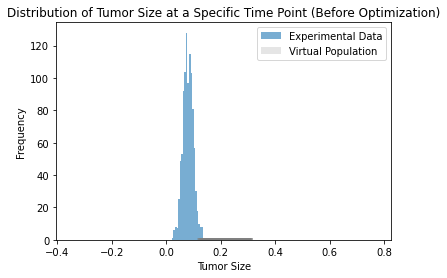

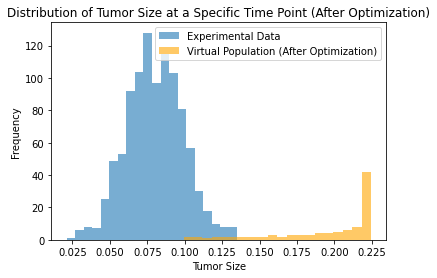

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import ks_2samp

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the common parameters for all virtual patients
k1 = 0.1
k2 = 0.05

# Define the number of virtual patients
num_patients = 1000

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Simulate the model for each virtual patient and store the results
results = []
for i in range(num_patients):
    # Generate random initial drug concentration and tumor size for each patient
    C_blood_initial = np.random.uniform(0.8, 1.2)  # Initial drug concentration
    Tumor_size_initial = np.random.uniform(0.05, 0.15)  # Initial tumor size
    y0 = [C_blood_initial, Tumor_size_initial]
    
    # Solve the ODE for the current virtual patient
    sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
    results.append(sol.y[1])  # Store only the tumor size

# Generate experimental data (make-up data)
experimental_tumor_size = np.random.normal(0.08, 0.02, num_patients)  # Mean=0.08, Std=0.02

# Plot the distribution of tumor size before optimization
plt.hist(experimental_tumor_size, bins=20, alpha=0.6, label="Experimental Data")
for i in range(num_patients):
    plt.hist(results[i][50], bins=20, alpha=0.2, color='gray', label="Virtual Population" if i == 0 else None)
plt.xlabel("Tumor Size")
plt.ylabel("Frequency")
plt.title("Distribution of Tumor Size at a Specific Time Point (Before Optimization)")
plt.legend()
plt.show()

# Define the objective function using Komogorov-Smirnov test
def objective_function(weights):
    simulated_tumor_size = np.sum(np.array(results) * weights[:, np.newaxis], axis=0)
    ks_statistic, _ = ks_2samp(simulated_tumor_size, experimental_tumor_size)
    return ks_statistic

# Initialize weights for each virtual patient with equal values (w1 = w2 = ... = w100)
initial_weights = np.ones(num_patients) / num_patients

# Perform the optimization to find the best weights for each virtual patient
result = minimize(objective_function, initial_weights, bounds=[(0, 1)] * num_patients)

# Extract the optimized weights for each virtual patient
optimized_weights = result.x

# Simulate the model with the optimized weights for each virtual patient
simulated_tumor_size = np.sum(np.array(results) * optimized_weights[:, np.newaxis], axis=0)

# Plot the distribution of tumor size after optimization
plt.hist(experimental_tumor_size, bins=20, alpha=0.6, label="Experimental Data")
plt.hist(simulated_tumor_size, bins=20, alpha=0.6, label="Virtual Population (After Optimization)", color='orange')
plt.xlabel("Tumor Size")
plt.ylabel("Frequency")
plt.title("Distribution of Tumor Size at a Specific Time Point (After Optimization)")
plt.legend()
plt.show()


In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from SALib.sample import saltelli, morris, latin

from scipy.stats import ks_2samp

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from SALib.sample import saltelli, morris, latin
from SALib.analyze import sobol, morris, fast

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from SALib.sample import saltelli, morris, latin
from SALib.analyze import sobol, morris, fast

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the common parameters for all virtual patients
k1 = 0.1
k2 = 0.05

# Define the number of virtual patients
num_patients = 100

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Simulate the model for each virtual patient and store the results
results = []
for i in range(num_patients):
    # Generate random initial drug concentration and tumor size for each patient
    C_blood_initial = np.random.uniform(0.8, 1.2)  # Initial drug concentration
    Tumor_size_initial = np.random.uniform(0.05, 0.15)  # Initial tumor size
    y0 = [C_blood_initial, Tumor_size_initial]
    
    # Solve the ODE for the current virtual patient
    sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
    results.append(sol.y[1])  # Store only the tumor size

# Generate experimental data (make-up data)
experimental_tumor_size = np.random.normal(0.08, 0.02, num_patients)  # Mean=0.08, Std=0.02

# Define the parameter ranges for sensitivity analysis
problem = {
    'num_vars': 2,
    'names': ['k1', 'k2'],
    'bounds': [[0.05, 0.2], [0.01, 0.1]]
}

# Perform Sobol sensitivity analysis
param_values = saltelli.sample(problem, 1000)
sobol_indices = sobol.analyze(problem, np.array(results), param_values)

# Perform Morris sensitivity analysis
param_values = morris.sample(problem, 1000, num_levels=4)
morris_indices = morris.analyze(problem, np.array(results), param_values)

# Perform FAST sensitivity analysis
param_values = latin.sample(problem, 1000)
fast_indices = fast.analyze(problem, np.array(results), param_values)

# Plot the sensitivity indices
plt.bar(problem['names'], sobol_indices['ST'], color='r', alpha=0.6, label='Sobol')
plt.bar(problem['names'], morris_indices['mu_star'], color='g', alpha=0.6, label='Morris')
plt.bar(problem['names'], fast_indices['S1'], color='b', alpha=0.6, label='FAST')
plt.xlabel("Parameter")
plt.ylabel("Sensitivity Index")
plt.title("Parameter Sensitivity Analysis")
plt.legend()
plt.show()



/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_44804/1384417897.py:63: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

# Define the ODE model for drug concentration in blood and tumor size
def ode_model(t, y, k1, k2):
    C_blood, Tumor_size = y
    dC_blood_dt = -k1 * C_blood
    dTumor_size_dt = k2 * C_blood - 0.1 * Tumor_size
    return [dC_blood_dt, dTumor_size_dt]

# Define the common parameters for all virtual patients
k1 = 0.1
k2 = 0.05

# Define the time points for simulation
t_start = 0
t_end = 10
num_time_points = 100
t_values = np.linspace(t_start, t_end, num_time_points)

# Generate random initial drug concentration and tumor size for the single simulation
C_blood_initial = np.random.uniform(0.8, 1.2)  # Initial drug concentration
Tumor_size_initial = np.random.uniform(0.05, 0.15)  # Initial tumor size
y0 = [C_blood_initial, Tumor_size_initial]

# Solve the ODE for the single simulation
sol = solve_ivp(ode_model, [t_start, t_end], y0, t_eval=t_values, args=(k1, k2))
results = sol.y[1]  # Store only the tumor size

# Perform Sobol sensitivity analysis
param_values = saltelli.sample({"num_vars": 2, "names": ['k1', 'k2'], "bounds": [[0.05, 0.2], [0.01, 0.1]]}, 1000)
sobol_indices = sobol.analyze({"num_vars": 2, "names": ['k1', 'k2'], "bounds": [[0.05, 0.2], [0.01, 0.1]]}, results, param_values)

# Plot the sensitivity indices
names = ['k1', 'k2']
sobol_indices_dict = {name: sobol_indices['ST'][i] for i, name in enumerate(names)}

plt.bar(names, sobol_indices_dict.values(), color='r', alpha=0.6, label='Sobol')
plt.xlabel("Parameter")
plt.ylabel("Sensitivity Index")
plt.title("Parameter Sensitivity Analysis")
plt.legend()
plt.show()


/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_44804/2558996362.py:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample({"num_vars": 2, "names": ['k1', 'k2'], "bounds": [[0.05, 0.2], [0.01, 0.1]]}, 1000)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()